Finding left and right of the circular robot using the arrow vector 

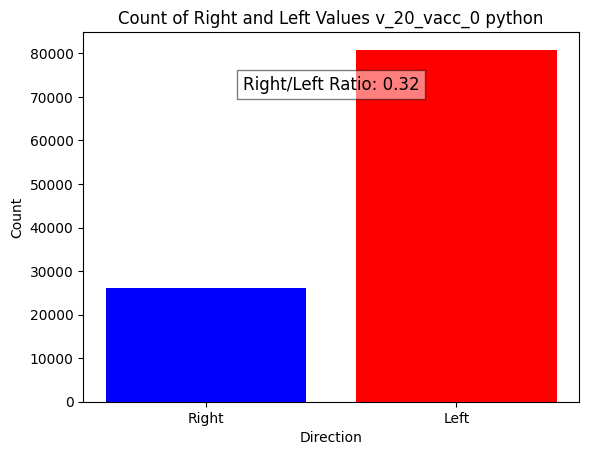

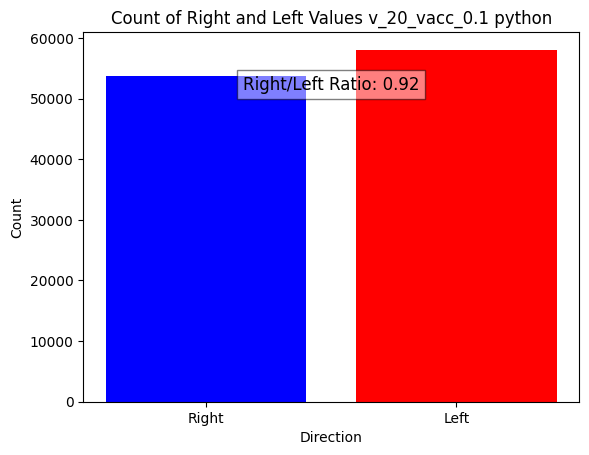

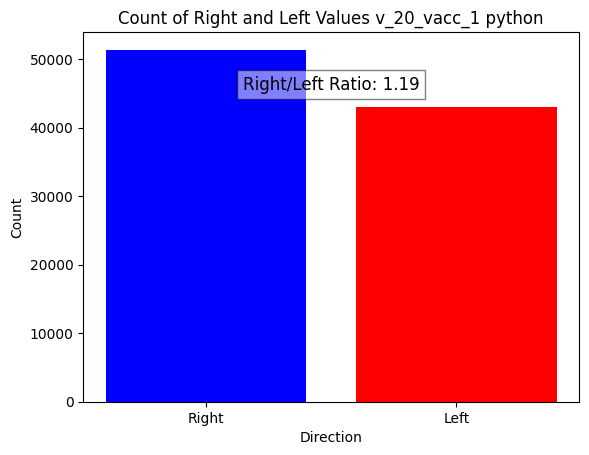

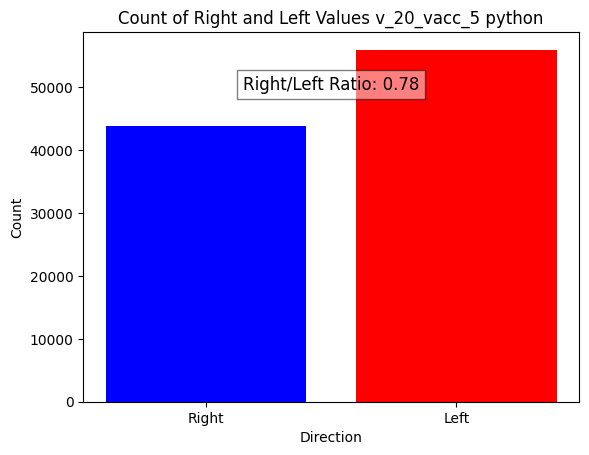

In [3]:
import csv
import matplotlib.pyplot as plt

def plot(path, name,value):
    right_count = 0
    left_count = 0

    with open(path, 'r') as file:
        csvfile = csv.reader(file)
        next(csvfile)  # Skip header
        csv_value = 0

        for lines in csvfile:
            if csv_value <= value:
                if lines[3] == "1":  # Compare with string "1"
                    right_count += 1
                else:
                    left_count += 1
                csv_value += 1
        
        # Calculate ratio, handle division by zero
        ratio = right_count / left_count if left_count != 0 else float('inf')

    # Plotting
    labels = ['Right', 'Left']
    counts = [right_count, left_count]
    plt.bar(labels, counts, color=['blue', 'red'])
    plt.text(0.5, max(counts) * 0.9, f'Right/Left Ratio: {ratio:.2f}', ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('Direction')
    plt.ylabel('Count')
    plt.title('Count of Right and Left Values ' + name + " python")
    plt.show()

plot("points_0.csv", "v_20_vacc_0",106870)
plot("points_0.1.csv", "v_20_vacc_0.1",111724)
plot("points_1.csv", "v_20_vacc_1",94413)
plot("points_5.csv", "v_20_vacc_5",99779)


Calculating the Accuracy of the robot in matlab and python

In [9]:
'''0
matlab | python
108042 | 106870



0.1
matlab |  python
111724 |  117028


1
matlab | python
94413    107860


5
matlab | python
99779    107956'''



print("Accuracy of python for 0:", (106870/108042)*100)
print("Accuracy of Matlab for 0:", (108042/106870)*100)
print("------------------------------------------------")
print("Accuracy of python for 0.1:", (117028/111724)*100)
print("Accuracy of Matlab for 0.1:", (111724/117028)*100)
print("------------------------------------------------")
print("Accuracy of python for 1:", (107860/94413)*100)
print("Accuracy of Matlab for 1:", (94413/107860)*100)
print("------------------------------------------------")
print("Accuracy of python for 5:", (107956/99779)*100)
print("Accuracy of Matlab for 5:", (99779/107956)*100)


Accuracy of python for 0: 98.915236667222
Accuracy of Matlab for 0: 101.09665949284177
------------------------------------------------
Accuracy of python for 0.1: 104.74741326841144
Accuracy of Matlab for 0.1: 95.46775130737943
------------------------------------------------
Accuracy of python for 1: 114.24274199527606
Accuracy of Matlab for 1: 87.53291303541629
------------------------------------------------
Accuracy of python for 5: 108.19511119574258
Accuracy of Matlab for 5: 92.42561784430694


Plotting the Trajectory using the center x and center y

In [32]:
import csv
import plotly.express as px
import pandas as pd

def trajectory(path, name,value, sample_rate=100):
    data = []
    with open(path, "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        count = 0
        for row in reader:
            if count < value:
                if count % sample_rate == 0:  # Sample the data
                    data.append([float(row[0]), float(row[1])])
                count += 1
    
    df = pd.DataFrame(data, columns=['x', 'y'])
    
    # Create an interactive plot using Plotly
    fig = px.scatter(df, x='x', y='y', title='Trajectory Plot'+" "+name, 
                     labels={'x': 'X Coordinate', 'y': 'Y Coordinate'}, 
                     template='plotly_white')
    fig.update_traces(marker=dict(size=6, opacity=0.5))  # Adjust marker size and opacity
    fig.update_layout(width=800, height=600, title_x=0.5, title_y=0.95, title_font_size=20)
    
    fig.show()


trajectory("points_0.csv", "v_20_vacc_0", 106870)
trajectory("points_0.1.csv", "v_20_vacc_0.1", 111724)
trajectory("points_1.csv", "v_20_vacc_1", 94413)
trajectory("points_5.csv", "v_20_vacc_5", 99779)


Plotting the Angle 

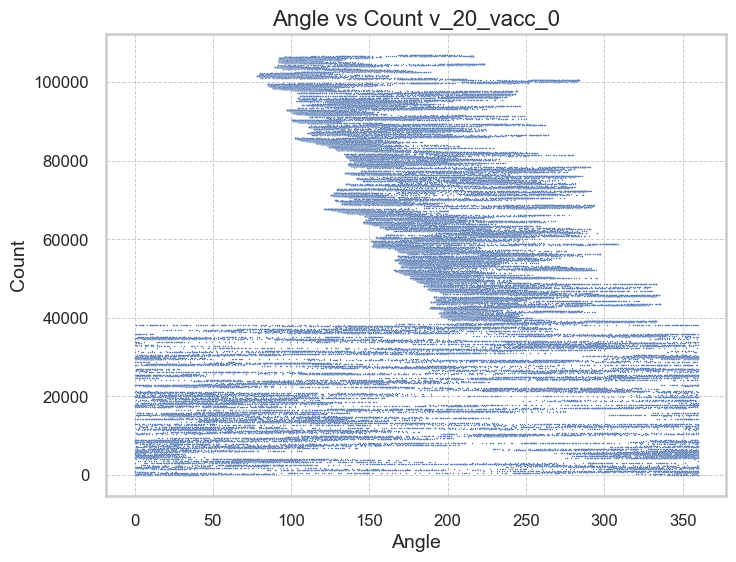

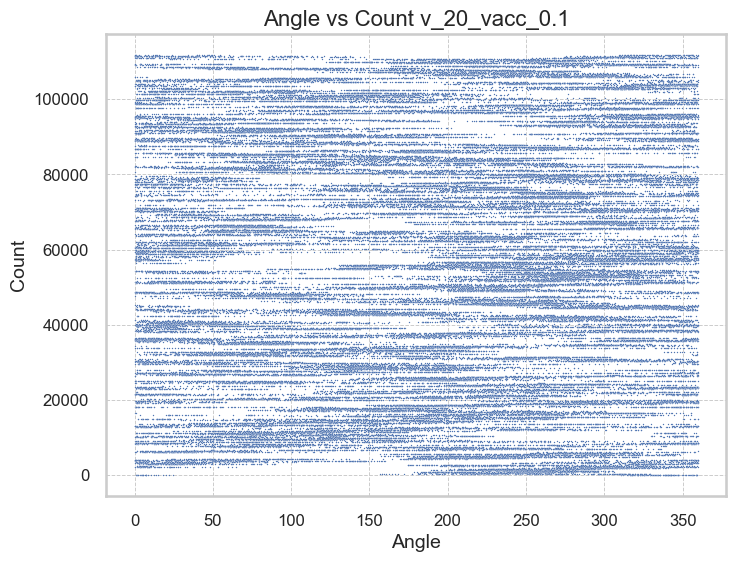

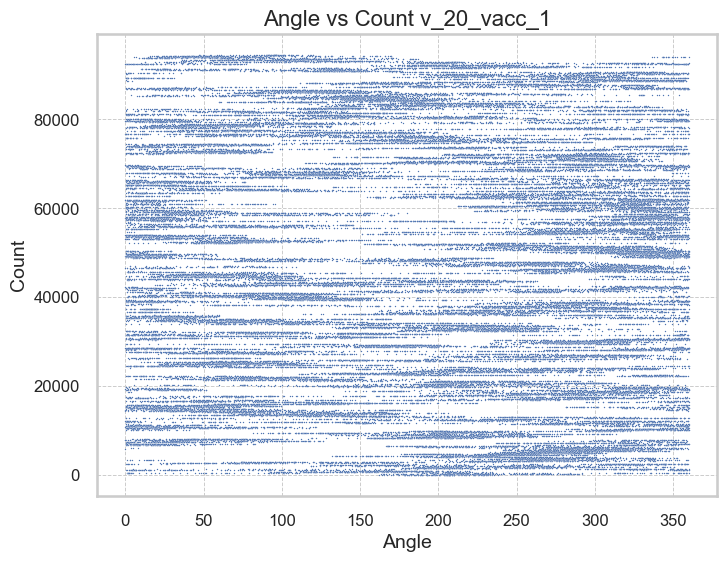

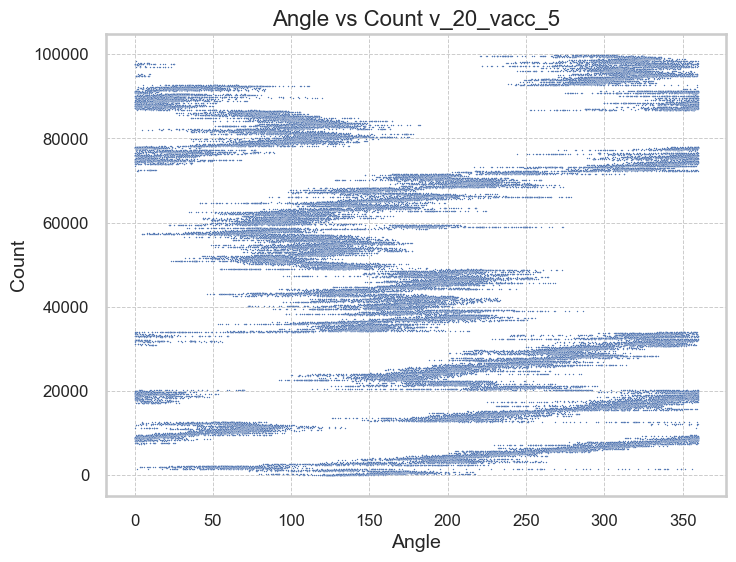

In [35]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns

def angle(path, name, value):
    with open(path, "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        
        count = 0
        x = []
        y = []
        
        for row in reader:
            if count < value:
                x.append(float(row[2]))
                y.append(count)
                count += 1

    # Set Seaborn style and context
    sns.set_style("whitegrid")
    sns.set_context("talk")

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, color='b', s=1)  # s=10 sets the marker size
    plt.xlabel('Angle', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Angle vs Count'+" "+name, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.show()

angle("points_0.csv", "v_20_vacc_0",106870)
angle("points_0.1.csv", "v_20_vacc_0.1",111724)
angle("points_1.csv", "v_20_vacc_1",94413)
angle("points_5.csv", "v_20_vacc_5",99779)


Plotting left and right using the displacement vector 

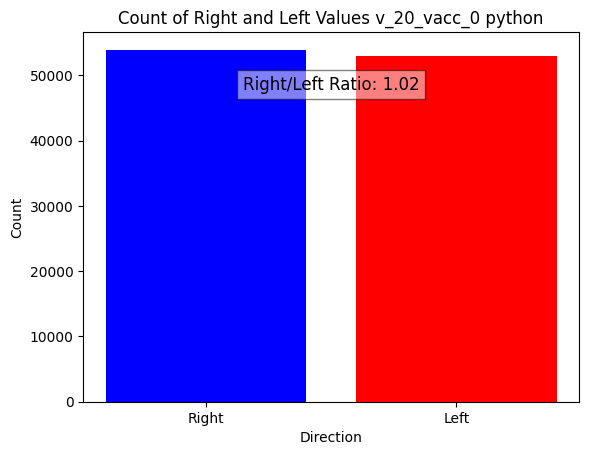

dx: [-1.1142597045898412, -1.1076972656250064, -0.7881002197265587, -0.49536529541015284, -0.5012478637695352, -0.2769580688476623, 0.35325787353515636, 0.3740108032226601, 0.6857194213867217, 0.7756455688476507, 0.7899324951171849, 1.407828796386724, 2.171603149414068, 2.2690368041992173, 0.9131481933593761, -0.521306457519529, -0.7474285278320423, -0.5436168212890635, -0.05542150878905261, -0.09522528076172421, -0.17174688720703557, 0.21605902099609864, 0.21108294677733852, 1.035187377929688, 1.3111859130859358, 1.1980139770507918, 1.1401622924804684, 1.1153204956054594, 1.0564899902343825, 1.1739243774414092, 1.723423767089841, 1.7322669067382748, 0.7615177612304791, -0.5822392578125033, -0.8102225341796867, -0.9130758666992165, -0.09504205322265591, -0.11758868408203682, 0.28493328857422284, 0.7097222290039014, 0.6989600219726526, 0.27008221435546886, -0.8567526855468657, -0.9587139892578165, -0.9541525878906327, -0.8195285644531225, -0.40131652832030795, 0.06454913330078682, 1.156

In [25]:
import csv
import math
import matplotlib.pyplot as plt

def right_left(anglet):
    if 0 <= anglet <= 90 or 270 <= anglet <= 360:
        return 1, 0
    else:
        return 0, 1

def angle_tanfunction(x, y):
    if x > 0 and y >= 0:
        return math.degrees(math.atan(y / x))
    elif x < 0 and y >= 0:
        return 180 + math.degrees(math.atan(y / x))
    elif x < 0 and y < 0:
        return 180 + math.degrees(math.atan(y / x))
    elif x > 0 and y < 0:
        return 360 + math.degrees(math.atan(y / x))
    elif x == 0 and y > 0:
        return 90
    elif x == 0 and y < 0:
        return 270
    return 0
    

def displacement_vector(path,name):
    file=open(path,"r+")
    reader = csv.reader(file)
    next(reader)

    x=[]
    y=[]
    dx=[]
    dy=[]
    right_count=0
    left_count=0
    
    for lines in reader:
        x.append(float(lines[0]))
        y.append(float(lines[1]))

    for j in range(1,len(x)):
        dx.append(x[j]-x[j-1])
        dy.append(y[j]-y[j-1])

    for i in range(0,len(dx)):
        angle_value=angle_tanfunction(dx[i],dy[i])
        right,left=right_left(angle_value)
        if right==1:
            right_count+=1
        else:
            left_count+=1

    ratio=right_count/left_count
    labels = ['Right', 'Left']
    counts = [right_count, left_count]
    plt.bar(labels, counts, color=['blue', 'red'])
    plt.text(0.5, max(counts) * 0.9, f'Right/Left Ratio: {ratio:.2f}', ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('Direction')
    plt.ylabel('Count')
    plt.title('Count of Right and Left Values ' + name + " python")
    plt.show()

    #print("dx:",dx)
    #print("dy:",dy)


displacement_vector("points_0.csv","v_20_vacc_0")
#displacement_vector("points_0.1.csv","v_20_vacc_0.1")
#displacement_vector("points_1.csv","v_20_vacc_1")
#displacement_vector("points_5.csv","v_20_vacc_5")
